In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import talib
from sklearn import tree, ensemble, model_selection
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="jumbotron">
    <p class="display-1 h1">Alpha模型——数据驱动</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 数据挖掘基础

## 数据挖掘

<dl class="row alert-info">
    <dt class="col-md-3">数据挖掘</dt>
    <dd class="col-md-9">从大量的数据中通过<strong>算法</strong>搜索<strong>隐藏</strong>于其中的信息的过程。</dd>
</dl>

### 应用领域广泛

- 金融
    + 信用卡交易反欺诈
    + 贷款申请反欺诈
    + 反洗钱
    + 推荐基金产品、保险产品等

- 电子商务（零售）
    + 推荐商品
    + 交叉销售
    + 销量预测等

- 媒体
    + 推荐相关内容，例如今日头条、抖音等

- 能源
    + 捕捉危险事件
    + 电力需求预测
    + 根据实时能源价格优化能源分配

- 医药
    + 疾病鉴别诊断
    + 药物研发
    + 智能健康电子记录
    + 流行病爆发预测

- 电信
    + 客户流失预测

### 挖掘算法分类

<center>
    <img src="./img/dataMining/miningAlgo.png" width=100%>
</center>

#### 监督学习v.s.无监督学习

<dl class="row alert-info">
    <dt class="col-md-3">有监督学习</dt>
    <dd class="col-md-9">输入数据<strong>带有</strong>标签。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-3">无监督学习</dt>
    <dd class="col-md-9">输入数据<strong>不带</strong>标签。</dd>
</dl>

<center><img src="./img/dataMining/supervisedunsupervised.jpg" width=80%></center>

#### 监督v.s.无监督在数据集中的表现

##### 监督学习

In [144]:
titanicDf = pd.read_csv('./data/models/train.csv')
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 标签：`Survived`

In [146]:
bostonDf = pd.read_csv('./data/models/boston.csv')
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 标签：`MEDV`

##### 无监督学习

In [148]:
rfmDf = pd.read_csv('../data-mining/data/mining/rfm.csv')
rfmDf.head()

,USERID,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM,Label
0,142074,813,2,9408.9,1,2,5,125,流失客户
1,56927,481,2,8826.9,5,2,5,525,重要价值客户
2,87058,680,2,11898.0,2,2,5,225,新客户
3,136104,818,1,5999.0,1,1,5,115,流失客户
4,117831,818,1,5399.0,1,1,5,115,流失客户


### 数据挖掘建模流程

<center><img src="./img/dataMining/miningModelling.png" width=80%></center>

## `scikit-learn`介绍

`scikit-learn`软件包

[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

- `scikit-learn`是`Python`的一个开源机器学习模块，它建立在`NumPy`，`SciPy`和`matplotlib`模块之上

- 为用户提供各种机器学习算法接口，可以让用户简单、高效地进行数据挖掘和数据分析

- 安装：`pip install -U scikit-learn`

- 使用：`from sklearn import 模块名称`

### 内置数据

- 两种类型数据的加载方式
    + 小规模数据：`load_数据名称()`
    + 大规模数据：`fetch_数据名称()`

- 返回的数据的结构：字典结构，至少包括两个关键字
    + `data`：属性（特征），`numpy`格式的矩阵，有`n_samples`行和`n_features`列
    + `target`：标签，`numpy`格式的数组，长度是`n_samples`

- 返回的数据具有`DESCR`属性，给予数据集详细描述

#### 小规模数据集

命令|数据描述|适合的方法
---|---|---
`load_boston()`|波士顿的房价数据|回归
`load_iris()`|鸢尾花（iris）数据集|分类
`load_diabetes()`|糖尿病(diabetes)数据集|回归
`load_digits()`|手写体数据集|分类
`load_linnerud()`|体能训练数据集|多元回归
`load_wine()`|酒类数据集|分类
`load_breast_cancer()`|威斯康星乳腺癌|分类

In [77]:
from sklearn import datasets

In [78]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [79]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
irisDf = pd.DataFrame(iris.data,columns=iris.feature_names)
irisDf['class'] = iris.target
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [83]:
diabetesDf = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetesDf['target'] = diabetes.target
diabetesDf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### 大规模数据集

命令|数据描述|适合的方法
---|---|---
`fetch_olivetti_faces()`|Olivetti人脸识别数据|分类
`fetch_20newsgroups()`|包括20个话题的新闻文本数据|分类
`fetch_20newsgroups_vectorized()`|包括20个话题的新闻文本向量化数据|分类
`fetch_lfw_people()`|带标签的人脸识别数据|分类
`fetch_lfw_pairs()`|带标签的人脸识别数据|分类
`fetch_covtype()`|森林植被类型数据|分类
`fetch_rcv1()`|路透社英文新闻文本数据|分类
`fetch_kddcup99()`|网络入侵检测数据|分类
`fetch_california_housing()`|加利福尼亚房价数据|回归

In [84]:
calh = datasets.fetch_california_housing()
print(calh.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [85]:
calhDf = pd.DataFrame(calh.data,columns=calh.feature_names)
calhDf['HouseValue'] = calh.target
calhDf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### `sklearn`数据挖掘一般流程

<center><img src="./img/dataMining/sklearnApp.png" width=80%></center>

### 波士顿房价 

#### 读取数据

In [86]:
bst = datasets.load_boston()
bstDf = pd.DataFrame(bst.data,columns=bst.feature_names)
bstDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 建立模型

In [87]:
from sklearn import linear_model
bstLearModel = linear_model.LinearRegression()
bstLearModel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 训练模型

In [88]:
bstLearModel.fit(bst.data,bst.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### 得到回归系数与截距

- 回归系数：`bstLearModel.coef_`
- 截距：`bstLearModel.intercept_`

In [89]:
print(f'回归系数为{[round(x,3) for x in bstLearModel.coef_]}')
print(f'截距为{bstLearModel.intercept_:.3f}')

回归系数为[-0.108, 0.046, 0.021, 2.687, -17.767, 3.81, 0.001, -1.476, 0.306, -0.012, -0.953, 0.009, -0.525]
截距为36.459


##### 拟合度

In [90]:
bstR2 = bstLearModel.score(bst.data,bst.target)
print(f'回归的R-squre为{bstR2:.3f}')

回归的R-squre为0.741


#### 预测

In [91]:
predicted = bstLearModel.predict(bst.data)
resDf = pd.DataFrame({'原价格':bst.target,'预测价格':predicted})
resDf

,原价格,预测价格
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
...,...,...
501,22.4,23.533341
502,20.6,22.375719
503,23.9,27.627426
504,22.0,26.127967


### 预处理模块

```python
    from sklearn import preprocessing
```

#### 标准化

```python
preprocessing.scale(X, axis=0)
```
- `axis`：沿轴标准化数据

In [92]:
bstPrice = bst.target
bstPrice.mean()
bstPrice.std()

22.532806324110677

9.188011545278203

In [93]:
from sklearn import preprocessing
bstPriceStd = preprocessing.scale(bstPrice)
bstPriceStd[:10]
bstPriceStd.mean()
bstPriceStd.std()

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548])

-5.195668225913776e-16

0.9999999999999999

## 其他数据挖掘模块

- PySpark：针对大数据的数据挖掘与机器学习工具，是`Spark`的`Python`接口

- Apache `Spark`
    + `Spark`：专为大规模数据处理而设计的快速通用的计算引擎

- 官网：[http://spark.apache.org/docs/latest/api/python/index.html](http://spark.apache.org/docs/latest/api/python/index.html)

- 学习链接：[http://codingdict.com/article/8888](http://codingdict.com/article/8888)

# 分类模型

> 如何判断贷款者是否会拖欠贷款？

In [94]:
debtDict = {'Tid': range(10), 
            '有房者': ['是', '否', '否', '是', '否', '否', '是','否', '否', '否'], 
            '婚姻状况': ['单身', '已婚', '单身', '已婚', '离异', '已婚', '离异', '单身', '已婚', '单身'], 
            '年收入': ['125K', '100K', '70K', '120K', '95K', '60K', '220K', '85K', '75K', '90K'], 
            '拖欠贷款者': ['否', '否', '否', '否', '是', '否', '否', '是', '否', '是']}

In [95]:
pd.DataFrame(debtDict)

,Tid,有房者,婚姻状况,年收入,拖欠贷款者
0,0,是,单身,125K,否
1,1,否,已婚,100K,否
2,2,否,单身,70K,否
3,3,是,已婚,120K,否
4,4,否,离异,95K,是
5,5,否,已婚,60K,否
6,6,是,离异,220K,否
7,7,否,单身,85K,是
8,8,否,已婚,75K,否
9,9,否,单身,90K,是


## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

### 建立分类模型的一般方法

<center><img src="./img/dataMining/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

#### 分类算法

+ k最近邻分类
+ **决策树**
+ 朴素贝叶斯分类
+ 逻辑回归
+ 神经网络
+ 支持向量机
+ **随机森林**

#### 混淆矩阵（confusion matrix）

- 由分类模型做出的正确和错误的分类结果构成的矩阵

- 二元分类问题的混淆矩阵

![](./img/dataMining/confusionMatrix.gv.svg)

#### 性能度量（performance metric）

- 汇总混淆矩阵的信息

- 准确率（accuracy）

$$
准确率=\frac{正确预测数}{预测总数}=\frac{f_{11}+f_{00}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

- 错误率（error rate）

$$
错误率=\frac{错误预测数}{预测总数}=\frac{f_{10}+f_{01}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

$$
错误率+准确率=1
$$

## 决策树

<center><img src="./img/dataMining/classificationSample.gv.svg" with=100%></center>

<center><img src="./img/dataMining/decisionTree.gv.svg" with=50%></center>

<center><img src="./img/dataMining/decisionTree1.gv.svg"></center>

> 对于同一个问题而言，决策树不是唯一的

### 基本概念

<center><img src="./img/dataMining/decisionTreeC.gv.svg" with=60%></center>

- **根结点**（root node）
    + 没有入边，但有零条或多条出边

- **内部结点**（internal node）
    + 恰有一条入边和两条或多条出边

- **叶结点**（leaf node）
    + 恰有一条入边，但没有出边
    + 又被称为终结点（terminal node）

- 每个叶结点赋予一个类标签

- 每个**非叶**结点包含属性测试的条件

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

In [96]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 用决策树预测

```python
dt.predict(X)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- 返回值：预测的类别，形状为`[n_samples]`的数组

### Titanic生存分类

#### 读取数据

In [97]:
titRawDf = pd.read_csv('./data/models/train.csv')
titRawDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titDf = titRawDf.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
titDf.set_index('PassengerId',inplace=True)
titDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0


#### 数据预处理

##### 删除包含缺失值的行

In [99]:
titDf.dropna(axis=0,how='any',inplace=True)

##### **One-Hot Encoding**：将标称属性转换成二元属性

> `DecisionTreeClassifer`只支持数值型预测属性
- 但是对类别标签没有要求

```python
pandas.get_dummies(data, columns=None)
```
- `data`：`Series`类型，或者`DataFrame`类型
- `columns`：列名的`list`类型，数据集中哪些列需要转换，默认是将数据集中所有列进行转换
- 返回值：由二元化的属性构成的`DataFrame`

##### one-hot编码

In [100]:
titDf.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [101]:
titX = titDf.iloc[:,:-1]
titY = titDf['Survived']
titX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [102]:
titXOH = pd.get_dummies(titX,columns=['Sex','Embarked'])
titXOH.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


#### 分割训练集与测试集

```python
from sklearn.model_selection import train_test_split
train_test_split(*arrays, test_size=0.25)
```

- `*arrays`：需要被划分的数据集，可以是`list`类型、`numpy.arrays`类型，`pandas.DataFrame`类型

- `test_size`：检验集的规模
    + `float`类型，取值范围`[0,1]`，表示检验集占原数据集的比例
    + `int`类型，表示检验集包含的数据记录的绝对数量
    + 默认为0.25

- 返回值：分割好的训练集与检验集，与输入的`*array`的类型相同

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
titTrainX,titTestX,titTrainY,titTestY = train_test_split(titXOH,titY)
titTrainX
titTestX
titTrainY.value_counts()
titTestY.value_counts()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
531,2,2.0,1,1,26.0000,1,0,0,0,1
34,2,66.0,0,0,10.5000,0,1,0,0,1
457,1,65.0,0,0,26.5500,0,1,0,0,1
752,3,6.0,0,1,12.4750,0,1,0,0,1
687,3,14.0,4,1,39.6875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
495,3,21.0,0,0,8.0500,0,1,0,0,1
543,3,11.0,4,2,31.2750,1,0,0,0,1
171,1,61.0,0,0,33.5000,0,1,0,0,1


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
403,3,21.0,1,0,9.825,1,0,0,0,1
443,3,25.0,1,0,7.775,0,1,0,0,1
277,3,45.0,0,0,7.750,1,0,0,0,1
250,2,54.0,1,0,26.000,0,1,0,0,1
511,3,29.0,0,0,7.750,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
163,3,26.0,0,0,7.775,0,1,0,0,1
464,2,48.0,0,0,13.000,0,1,0,0,1
734,2,23.0,0,0,13.000,0,1,0,0,1


0    317
1    217
Name: Survived, dtype: int64

0    107
1     71
Name: Survived, dtype: int64

#### 建立决策树模型

In [105]:
titDt = tree.DecisionTreeClassifier(random_state=10)

#### 在训练集上训练模型

In [106]:
titDt.fit(titTrainX,titTrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#### 分类性能度量 

In [107]:
titTrainYPre = titDt.predict(titTrainX)

##### 混淆矩阵

```python
    from sklearn import metrics
    metrics.confusion_matrix(y_true, y_pred)
    metrics.plot_confusion_matrix(estimator, X, y_true, values_format=None)
```
- `estimator`：训练好的分类器
- `X`：预测属性
- `value_formats`：数字的显示格式

In [108]:
from sklearn import metrics

array([[317,   0],
       [  6, 211]])

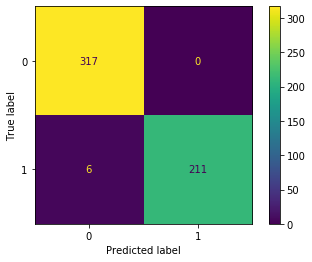

In [109]:
metrics.confusion_matrix(titTrainY, titTrainYPre)
metrics.plot_confusion_matrix(titDt,titTrainX,titTrainY,values_format='.0f')

<center><img src="./img/dataMining/classificationScoreN1.png" width=100%></center>

##### 准确率 (accuracy score)

```python
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)
```
- `y_true`：真实类标签构成的数组
- `y_pred`：分类模型预测的类标签构成的数组

In [110]:
metrics.accuracy_score(titTrainY,titTrainYPre)

0.9887640449438202

##### 召回率 （recall score）

- 能够识别所有属于某个真实类别的样本的能力

```python
metrics.recall_score(y_true, y_pred, pos_label=1)
```

In [111]:
print(f'未生还的分类的召回率是{metrics.recall_score(titTrainY,titTrainYPre,pos_label=0)}')

未生还的分类的召回率是1.0


In [112]:
print(f'生还的分类的召回率是{metrics.recall_score(titTrainY,titDt.predict(titTrainX),pos_label=1)}')

生还的分类的召回率是0.9723502304147466


##### 精确率（precision score）

- 针对某个类别的样本，不做出错误分类的能力

```python
from sklearn import metrics
metrics.precision_score(y_true, y_pred, pos_label=1)
```

In [113]:
print(f'未生还的分类的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=0)}')

未生还的分类的精确率是0.9814241486068112


In [114]:
print(f'生还的分类的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=1)}')

生还的分类的精确率是1.0


##### $F_1$ score

- 同时考虑召回率和精确率，是召回率和精确率的几何均值

```python
from sklearn import metrics
metrics.f1_score(y_true, y_pred, pos_label=1)
```

In [115]:
print(f'未生还的分类的F1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=0)}')

未生还的分类的F1_score是0.990625


In [116]:
print(f'生还的分类的F1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=1)}')

生还的分类的F1_score是0.985981308411215


##### 在检验集上的分类性能

###### 生成检验集的类别预测

In [117]:
titTestYPre = titDt.predict(titTestX)

###### 分类性能指标

In [118]:
print(f'对检验集的分类准确率是{metrics.accuracy_score(titTestY,titTestYPre)}')

对检验集的分类准确率是0.7696629213483146


In [119]:
print(f'在检验集上未生还分类的召回率是{metrics.recall_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的召回率是0.8504672897196262


In [120]:
print(f'在检验集上生还分类的召回率是{metrics.recall_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的召回率是0.647887323943662


###### 分类性能指标-续

In [121]:
print(f'在检验集上未生还分类的精确率是{metrics.precision_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的精确率是0.7844827586206896


In [122]:
print(f'在检验集上生还分类的精确率是{metrics.precision_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的精确率是0.7419354838709677


In [123]:
print(f'在检验集上未生还分类的F1_score是{metrics.f1_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的F1_score是0.8161434977578476


In [124]:
print(f'在检验集上生还分类的F1_score是{metrics.f1_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的F1_score是0.6917293233082707


<p class="alert alert-danger">生成的决策树模型在<strong>训练集</strong>上的分类性能优异，但是在<strong>检验集</strong>上的分类性能一般。</p>

### 决策树的剪枝

- 为什么需要剪枝？
    + 生成的决策树过于复杂，对训练集的过度拟合
    + 决策树算法没有考虑数据中存在噪声

- 剪枝方法
    + 先剪枝
    + 后剪枝

#### 先剪枝（Forward-Pruning）

<p class="alert alert-info">提前停止树的构造而对树进行剪枝</p>

- 在决策树到达一定高度的情况下就停止树的生长
- 到达结点的样本个数小于某一个阈值可停止树的生长

```python
tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
```

- `max_depth`：`int`类型或`None`，树的最大深度。若为`None`，则所有的叶结点都只包含纯类，或者所有叶结点包含的样本数量小于`min_samples_split`
    + 值过大会导致算法对训练集的**过拟合**，而过小会妨碍算法对数据的学习
    + 推荐初始设置为3，先观察生成的决策树对数据的初步拟合状况，再决定是否要增加深度

- `min_samples_leaf`：`int`类型或`float`类型，划分一个内部结点需要的最少的样本数量。
    + `int`类型，`min_samples_split`为最小值，默认是2个样本
    + `float`类型，在全部样本中的占比，`ceil(min_samples_split * n_samples)`为最小值
    + 值越大，决策树的枝越少，达到一定的先剪枝效果

- `min_samples_leaf`：`int`类型或`float`类型，每个叶结点需要包含的最少的样本数量。
    + `int`类型，`min_samples_leaf`为最小值，默认是1个样本
    + `float`类型，在全部样本中的占比，`ceil(min_samples_leaf * n_samples)`为最小值
    + 值越大，决策树的枝越少，达到一定的先剪枝效果

#### 对titanic决策树先剪枝

##### 决策树模型

In [125]:
titDtForp = tree.DecisionTreeClassifier(max_depth=5,min_samples_split= 10,min_samples_leaf=10)

##### 训练

In [126]:
titDtForp.fit(titTrainX,titTrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 决策树在训练集上的性能

In [127]:
titTrainYPreForp = titDtForp.predict(titTrainX)

In [128]:
print(f'先剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTrainY,titTrainYPreForp)}')

先剪枝的决策树在训练集上的F1_score是0.795


##### 决策树在检验集上的性能

In [129]:
titTestYPreForp = titDtForp.predict(titTestX)

In [130]:
print(f'先剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTestY,titTestYPreForp)}')

先剪枝的决策树在训练集上的F1_score是0.6717557251908396


#### 后剪枝（Post-Pruning）

<p class="alert alert-danger">构造完整的决策树，然后用叶结点替换那些置信度不够的结点的子树，该叶结点所应标记的类别为被替换的子树中大多数样本所属的类别。</p>

```python
tree.DecisionTreeClassifier(ccp_alpha=None)
```
- `ccp_alpha`：非负的浮点数，利用成本复杂度剪枝（cost-complexity pruning），保留那些成本复杂度值低于该参数的子树

#### 对titanic决策树后剪枝

##### 建立后剪枝模型

In [131]:
titDtPostp = tree.DecisionTreeClassifier(ccp_alpha=0.035,random_state=10)

##### 训练决策树

In [132]:
titDtPostp.fit(titTrainX,titTrainY)

DecisionTreeClassifier(ccp_alpha=0.035, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

##### 在训练集上的分类性能

In [133]:
titTrainYPrePostp = titDtPostp.predict(titTrainX)

In [134]:
print(f'后剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTrainY,titTrainYPrePostp)}')

后剪枝的决策树在训练集上的F1_score是0.6880466472303207


##### 在检验集上的分类性能

In [135]:
titTestYPrePostp = titDtPostp.predict(titTestX)

In [136]:
print(f'后剪枝的决策树在检验集上的F1_score是{metrics.f1_score(titTestY,titTestYPrePostp)}')

后剪枝的决策树在检验集上的F1_score是0.5882352941176471


##### 如何选择$ccp\_alpha$?

```python
dt.cost_complexity_pruning_path(self, X, y)
```
- 返回利用成本复杂度剪枝计算过程，字典结构，包括`ccp_alpha`数组和`impurities`数组
- `X`：训练集的预测属性
- `y`：类别列表

###### 得到剪枝的`ccp_alpha`

In [137]:
ccp_path = titDt.cost_complexity_pruning_path(titTrainX, titTrainY)
alphas = ccp_path['ccp_alphas']

###### 生成具有不同`ccp_alpha`决策树列表

In [138]:
dts = []
for ccp_alpha in alphas[:-1]:
    # alphas[:-1]去除掉最大值，因为只包含一个节点
    dt = tree.DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
    dt.fit(titTrainX, titTrainY)
    dts.append(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0006242197253433209, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0006242197253433209, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0009603380389897227, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.00100835494093921, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0010700909577314075, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0010923845193508116, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0010923845193508116, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0011235955056179768, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0011349449551696744, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0011596615341933703, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0011704119850187266, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0012048947111736278, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0012306046013911185, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.001238655054198126, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0014816644030127175, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0014981273408239697, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.001576830293986013, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0016051364365971112, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0016248377236095998, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0016385767790262173, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0017024174327545116, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.001728608470181504, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0018521042317947156, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0023274478330658106, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0023433758017902748, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.002377979906069793, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0024968789013732834, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0024968789013732834, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0024968789013732834, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.002548897211818559, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0026316063254265506, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0026502586053147852, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0028533645249957905, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.002862189308818522, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0028692332259094722, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0032491436985819014, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0032771535580524347, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.005270406227532894, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.008892486087306126, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.009041696190572608, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.010114821538370233, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.014598229485869932, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.021150672890258876, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0388710984048901, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=10, splitter='best')

###### 计算每个决策树在训练集和检验集上的准确率

In [139]:
trainScoreLst = [metrics.accuracy_score(titTrainY,dt.predict(titTrainX)) for dt in dts]
testScoreLst = [metrics.accuracy_score(titTestY,dt.predict(titTestX)) for dt in dts]

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 0, 'ccp_alpha'),
 Text(0.5, 1.0, 'ccp_alpha v.s. accuracy')]

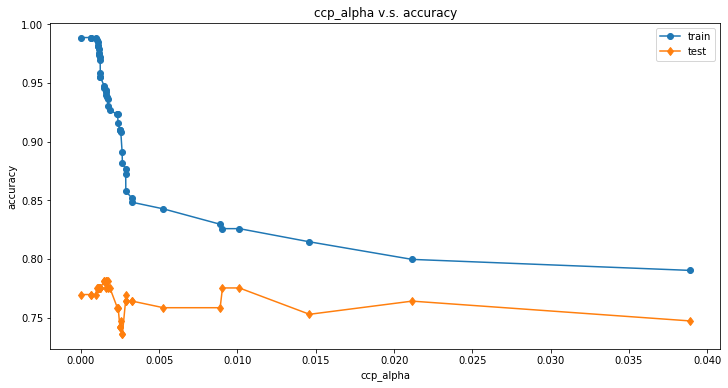

In [140]:
alphaTestDf = pd.DataFrame({'a':alphas[:-1],'train':trainScoreLst,'test':testScoreLst})
ax = alphaTestDf.plot(x='a',y='train',kind='line',figsize=(12,6),marker='o')
alphaTestDf.plot(x='a',y='test',kind='line',marker='d',ax=ax)
ax.set(title='ccp_alpha v.s. accuracy',xlabel='ccp_alpha',ylabel='accuracy')

[绘图数据点可选标记 https://matplotlib.org/3.2.1/api/markers_api.html](https://matplotlib.org/3.2.1/api/markers_api.html)

##### 选取最佳的`ccp_alpha`

In [141]:
alphaTestDf.loc[(alphaTestDf['train']>=0.8)& (alphaTestDf['test']==alphaTestDf['test'].max()),:]

,a,train,test
17,0.001482,0.947566,0.780899
18,0.001498,0.945693,0.780899
19,0.001577,0.943820,0.780899
20,0.001605,0.941948,0.780899
22,0.001639,0.938202,0.780899
23,0.001702,0.936330,0.780899


##### 可视化决策树

##### 决策规则以文本形式输出

```python
tree.export_text(decision_tree, feature_names=None)
```
- `decision_tree`：训练过的决策树模型
- `feature_names`：由预测属性名称构成的列表

In [142]:
print(tree.export_text(dts[46],feature_names=list(titTrainX.columns)))

|--- Sex_female <= 0.50
|   |--- class: 0
|--- Sex_female >  0.50
|   |--- class: 1



##### 决策规则以图形形式输出

<Figure size 864x432 with 0 Axes>

[Text(334.8, 244.62, 'X[5] <= 0.5\ngini = 0.482\nsamples = 534\nvalue = [317, 217]'),
 Text(167.4, 81.54000000000002, 'gini = 0.311\nsamples = 333\nvalue = [269, 64]'),
 Text(502.20000000000005, 81.54000000000002, 'gini = 0.364\nsamples = 201\nvalue = [48, 153]')]

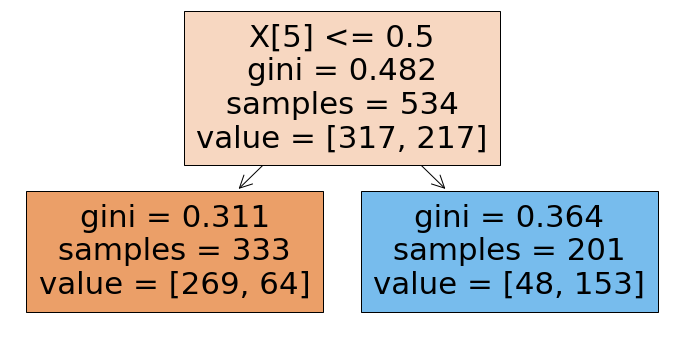

In [143]:
plt.figure(figsize=(12,6))
tree.plot_tree(dts[46],filled=True)

## 用决策树分类收益

### 读入并整理数据

In [217]:
rbd = pd.read_csv('./data/strategy/rbDaily.csv')
rbd.head()

,ActionDay,Close,High,Low
0,20160104,1775,1806,1773
1,20160105,1779,1790,1761
2,20160106,1783,1786,1766
3,20160107,1772,1786,1747
4,20160108,1752,1775,1750


In [218]:
rbd['Open'] = rbd['Close']

In [203]:
rbd.loc[rbd.isna().sum(axis=1)>0,:]

,ActionDay,Close,High,Low,Open


In [204]:
rbd.loc[rbd.duplicated()==True,:]

,ActionDay,Close,High,Low,Open


In [219]:
rbd['ActionDay'] = pd.to_datetime(rbd['ActionDay'],format='%Y%m%d')
rbd.set_index('ActionDay',inplace=True)
rbd.head()

,Close,High,Low,Open
ActionDay,,,,
2016-01-04,1775,1806,1773,1775
2016-01-05,1779,1790,1761,1779
2016-01-06,1783,1786,1766,1783
2016-01-07,1772,1786,1747,1772
2016-01-08,1752,1775,1750,1752


### 构建分类标签

- 以日价格的增长率作为分类标签

In [220]:
rbd['ret'] = rbd['Close'].pct_change()
rbd.head()

,Close,High,Low,Open,ret
ActionDay,,,,,
2016-01-04,1775,1806,1773,1775,NaN
2016-01-05,1779,1790,1761,1779,0.002254
2016-01-06,1783,1786,1766,1783,0.002248
2016-01-07,1772,1786,1747,1772,-0.006169
2016-01-08,1752,1775,1750,1752,-0.011287


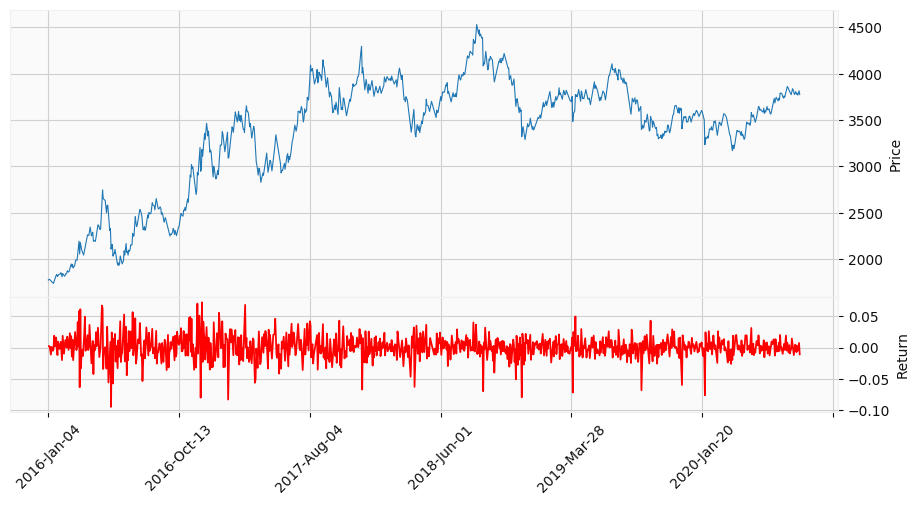

In [221]:
addFig = [mpf.make_addplot(rbd['ret'],panel=1,type='line',color='red',ylabel='Return')]
mpf.plot(rbd,type='line',style='yahoo',addplot=addFig,figratio=(12,6),figscale=1)

In [222]:
rbd['y'] = np.where(rbd['ret'] > 0,1,-1)
rbd.head()

,Close,High,Low,Open,ret,y
ActionDay,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1
2016-01-05,1779,1790,1761,1779,0.002254,1
2016-01-06,1783,1786,1766,1783,0.002248,1
2016-01-07,1772,1786,1747,1772,-0.006169,-1
2016-01-08,1752,1775,1750,1752,-0.011287,-1


### 构建分类属性（特征）

#### 动量因子

- 商品的超额收益在过去7日内的均值

In [228]:
rbd['mf'] = talib.SMA(rbd['ret'],timeperiod=7)
rbd.head(14)

,Close,High,Low,Open,ret,y,mf
ActionDay,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152


#### 波动率因子

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

In [232]:
retMu7 = talib.SMA(rbd['ret'],timeperiod=7)
retVar7 = talib.VAR(rbd['ret'],timeperiod=7)
rbd['vola'] = retVar7/np.abs(retMu7)
rbd.head(14)

,Close,High,Low,Open,ret,y,mf,vola
ActionDay,,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN,NaN
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083


#### 价值因子

- 因子构成

\begin{equation}
  ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

In [234]:
closeMu7 = talib.SMA(rbd['Close'],timeperiod=7)
rbd['val'] = np.log(closeMu7/rbd['Close'])
rbd.head(14)

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-01-04,1775,1806,1773,1775,NaN,-1,NaN,NaN,NaN
2016-01-05,1779,1790,1761,1779,0.002254,1,NaN,NaN,NaN
2016-01-06,1783,1786,1766,1783,0.002248,1,NaN,NaN,NaN
2016-01-07,1772,1786,1747,1772,-0.006169,-1,NaN,NaN,NaN
2016-01-08,1752,1775,1750,1752,-0.011287,-1,NaN,NaN,NaN
2016-01-09,1754,1756,1748,1754,0.001142,1,NaN,NaN,NaN
2016-01-11,1753,1772,1750,1753,-0.000570,-1,NaN,NaN,0.007874
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119,0.010511
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083,0.009641


#### 删除含有缺失值的行

In [235]:
rbd.dropna(inplace=True)
rbd.head()

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-01-12,1744,1759,1735,1744,-0.005134,-1,-0.002502,0.009119,0.010511
2016-01-13,1740,1748,1736,1740,-0.002294,-1,-0.003152,0.006083,0.009641
2016-01-14,1773,1777,1732,1773,0.018966,1,-0.000764,0.103671,-0.009960
2016-01-15,1794,1796,1760,1794,0.011844,1,0.001810,0.050343,-0.019946
2016-01-16,1797,1798,1792,1797,0.001672,1,0.003661,0.017256,-0.017968


#### 观察类标签是否均衡

In [238]:
rbd['y'].value_counts()

 1    594
-1    549
Name: y, dtype: int64

### 构建决策树模型

#### 划分训练集与检验集

In [237]:
rbdTrain,rbdTest = train_test_split(rbd,test_size=0.25,random_state=10)
rbdTrain.head()
rbdTest.head()

,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-04-19,2583,2586,2417,2583,0.067355,1,0.017284,0.045053,-0.078974
2019-05-23,3840,3912,3827,3840,-0.018154,-1,0.006717,0.020877,-0.005334
2016-05-06,2329,2352,2281,2329,0.009099,1,-0.014395,0.054072,0.048606
2016-12-21,3155,3199,3093,3155,-0.006612,-1,-0.013092,0.025347,0.034927
2017-09-08,3854,4038,3853,3854,-0.033116,-1,-0.002395,0.205826,0.041353


,Close,High,Low,Open,ret,y,mf,vola,val
ActionDay,,,,,,,,,
2016-04-09,2250,2258,2244,2250,0.002227,1,-0.000827,0.440944,-0.011944
2016-11-28,3204,3238,3140,3204,0.023315,1,0.020670,0.049165,-0.085262
2020-08-03,3849,3857,3778,3849,0.019333,1,0.002288,0.035636,-0.021155
2016-04-18,2420,2427,2339,2420,0.041756,1,0.010646,0.035538,-0.031056
2016-03-10,2109,2198,2068,2109,-0.033012,-1,0.009716,0.195223,-0.006388


#### 构建并训练决策树

In [239]:
rbdTree = tree.DecisionTreeClassifier()

In [241]:
rbdTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 训练集分类效果检验

In [251]:
rbdTrainYPre = rbdTree.predict(rbdTrain.loc[:,['mf','vola','val']])

In [250]:
metrics.accuracy_score(rbdTrain['y'],rbdTrainYPre)

1.0

In [244]:
metrics.f1_score(rbdTrain['y'],rbdTrainYPre,pos_label=1)

1.0

In [245]:
metrics.f1_score(rbdTrain['y'],rbdTrainYPre,pos_label=-1)

1.0

#### 检验集分类效果检验

In [246]:
rbdTestYPre = rbdTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [247]:
metrics.accuracy_score(rbdTest['y'],rbdTestYPre)

0.6083916083916084

In [248]:
metrics.f1_score(rbdTest['y'],rbdTestYPre,pos_label=1)

0.6137931034482759

In [249]:
metrics.f1_score(rbdTest['y'],rbdTestYPre,pos_label=-1)

0.6028368794326241

### 显示决策树

<Figure size 1200x600 with 0 Axes>

[Text(460.0856413994169, 449.8421052631579, 'X[2] <= 0.003\ngini = 0.499\nsamples = 857\nvalue = [408, 449]'),
 Text(249.78498542274053, 425.5263157894737, 'X[2] <= -0.019\ngini = 0.426\nsamples = 513\nvalue = [158, 355]'),
 Text(75.0710641399417, 401.2105263157895, 'X[0] <= 0.016\ngini = 0.269\nsamples = 162\nvalue = [26, 136]'),
 Text(36.26457725947522, 376.89473684210526, 'X[2] <= -0.041\ngini = 0.228\nsamples = 145\nvalue = [19, 126]'),
 Text(30.841836734693878, 352.57894736842104, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(41.68731778425656, 352.57894736842104, 'X[2] <= -0.039\ngini = 0.276\nsamples = 115\nvalue = [19, 96]'),
 Text(36.26457725947522, 328.2631578947369, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(47.1100583090379, 328.2631578947369, 'X[0] <= 0.005\ngini = 0.256\nsamples = 113\nvalue = [17, 96]'),
 Text(10.845481049562682, 303.9473684210526, 'X[1] <= 0.513\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(5.422740524781341, 279.63157894736844, 'gi

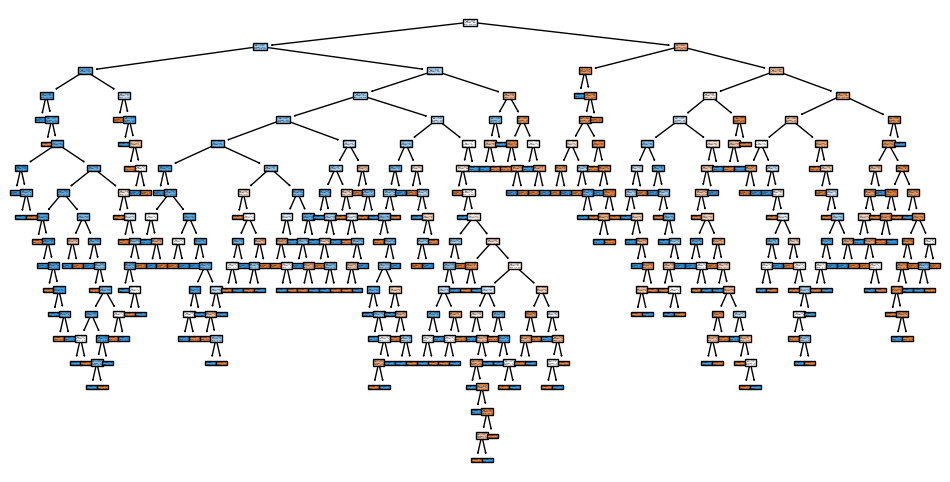

In [254]:
plt.figure(figsize=(12,6))
tree.plot_tree(rbdTree,filled=True)

## 随机森林（Random Forest）

- 属于一种集成学习（ensemble learning）方法
- 组合多个决策树，通过投票的方式确定样本所属的类别，使得整体模型在抑止过度拟合的同时，获得较好的精确度

<center><img src="./img/dataMining/randomForest.jpg" width=100%></center>

### 建立随机森林模型

```python
from sklearn import ensemble
ensemble.RandomForestClassifier()
```

In [289]:
rbRandTree = ensemble.RandomForestClassifier(random_state=10)

In [290]:
rbRandTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

### 训练集分类效果检验

In [262]:
rbRandTrainYPre = rbRandTree.predict(rbdTrain.loc[:,['mf','vola','val']])

In [263]:
metrics.accuracy_score(rbRandTrainYPre,rbdTrain['y'])

1.0

In [264]:
metrics.f1_score(rbRandTrainYPre,rbdTrain['y'],pos_label=1)

1.0

In [265]:
metrics.f1_score(rbRandTrainYPre,rbdTrain['y'],pos_label=-1)

1.0

### 检验集分类效果检验

In [266]:
rbRandTestYPre = rbRandTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [267]:
metrics.accuracy_score(rbRandTestYPre,rbdTest['y'])

0.6538461538461539

In [268]:
metrics.f1_score(rbRandTestYPre,rbdTest['y'],pos_label=1)

0.6732673267326733

In [269]:
metrics.f1_score(rbRandTestYPre,rbdTest['y'],pos_label=-1)

0.6319702602230484

In [283]:
rbRandTreeNew = ensemble.RandomForestClassifier(random_state=10)

In [288]:
trainScores = model_selection.cross_val_score(rbRandTreeNew,rbd.loc[:,['mf','vola','val']],rbd['y'],cv=5)
trainScores

array([0.70491803, 0.7398374 , 0.69291339, 0.70434783, 0.69135802])

In [286]:
trainScores.mean()

0.6876618401899945

# 聚类模型

## 基本概念

<dl class="row alert-info">
    <dt class="col-md-2">聚类</dt>
    <dd class="col-md-10">是一种将特征相似的样本聚集到一起，从而达到区分具有不同特征的样本的目的无监督的算法</dd>
</dl>

- 不需要事先知道类别信息

- 聚类形成的每一个组，被称为**簇（cluster）**

- 聚类的目标：簇内的样本之间尽可能相似，不同簇的样本尽可能不同

<img src="./img/dataMining/clustering.png" width=50%>

## K均值

- 基于划分的聚类，发现指定个数（$K$）的簇

- 基本思想：利用样本之间的距离衡量样本之间的相似性，用一组样本的质心（该组样本的均值）作为簇的中心，找到紧凑且独立的簇

- 簇之间彼此**互斥**，即每个样本**只能**分属于一个簇

### 基本算法

<center><img src='./img/dataMining/kmago.svg' width=100%></center>

##### $K$均值聚类过程示例

<center><img src="./img/dataMining/kmeansProcess.gif" width=100%></center>

#### 距离的度量

- 欧式空间：欧几里得距离，$n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是:
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 目标函数

- 目标函数为每个点到最近质心的欧几里得距离的**误差平方和**（sum of the squared error, SSE）最小

$$
\begin{split}
SSE &= \sum_{i=1}^K\sum_{\boldsymbol{x}\in C_i}d(\boldsymbol{c}_i, \boldsymbol{x})^2\\
\boldsymbol{c}_i&=\frac{1}{m_i}\sum_{\boldsymbol{x}\in C_i}\boldsymbol{x}
\end{split}
$$
其中，$\boldsymbol{x}$是数据点，$C_i$是第$i$个簇，$c_i$是第$i$个簇的质心，$m_i$是第$i$个簇包含的数据点的个数，$K$是簇的个数

- 簇内的误差平方和（SSE）也被称作cluster inertia

### $K$均值的`Python`实现

```python
from sklearn.cluster import KMeans
KMeans(n_clusters=8, init=’k-means++’, max_iter=300, random_state=None, n_jobs=None)
```
- `n_clusters`：`int`类型，簇的个数
- `init`：初始质心的方法，可以选择`k-means++`或`random`
- `max_iter`：最大迭代次数
- `random_state`：初始质心的随机生成种子
- `n_jobs`：用多少个CPU运行

#### 建立$K$均值聚类模型

##### 读取`iris`数据

In [3]:
irisdf = pd.read_csv('./data/visualization/iris.csv',header=0)
irisdf.head()
irisdf.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

##### 绘制属性箱型图，检查属性取值范围

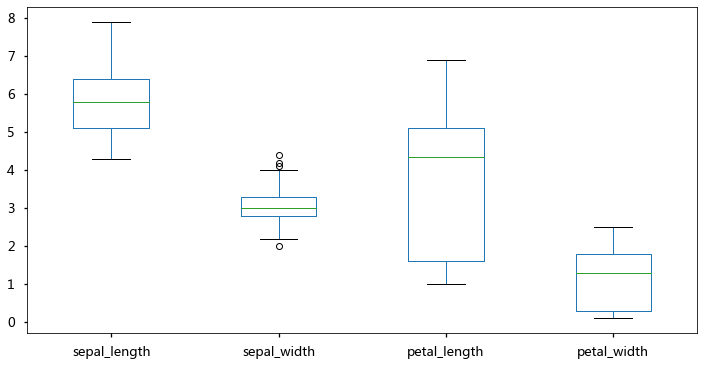

In [4]:
irisdf.plot(y=['sepal_length','sepal_width','petal_length','petal_width'],kind='box',figsize=(12,6))

- 各个属性取值基本可比，不需要进行标准化处理

##### 建立聚类模型

In [5]:
from sklearn.cluster import KMeans

In [6]:
irisKmeans = KMeans(n_clusters=3,random_state=0,n_jobs=-1)
irisKmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### 训练$K$均值聚类模型

```python
kmeans.fit(X)
```
- `X`：需要聚类的数据集

In [7]:
irisX = irisdf.iloc[:,:-1]
irisX.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
irisKmeans.fit(irisX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### 训练好的聚类模型的属性

- `labels_`：每个数据点（样本）的标签，即所属的簇

In [9]:
irisKmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

- `inertia_`：簇内误差平方和

In [10]:
irisKmeans.inertia_

78.94084142614602

#### 预测样本所属的距离最近的簇

```python
kmean.predict(X)
```
- 返回值：每个样本属于的簇的标签，是一个数组结构，形状为`[n_samples]`

In [11]:
irisLabel = irisKmeans.predict(irisX)
irisLabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### 选择$K$值

> 随着$K$值的增大，簇内误差平方和（SSE）会降低

<dl class="row alert-info">
    <dt class="col-xl-4">肘部(elbow)法则<dt>
    <dd class="col-xl-8">识别SSE<strong>开始快速增大</strong>处的$K$值</dd>
</dl>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

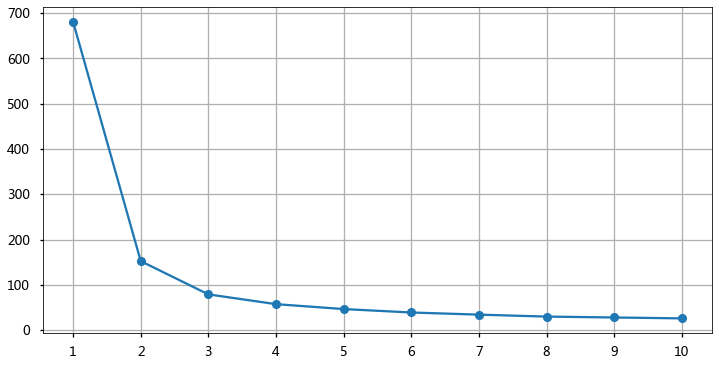

In [12]:
sse = []                ###记录每个k值对应的SSE
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1)
    km.fit(irisX)
    sse.append(km.inertia_)
ax = pd.Series(sse).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))   #xticks：在哪些位置显示x轴刻度标签
ax.set(xticklabels=range(1,11))        # 改变x轴标签显示，默认是从0开始

- 当$K=3$的时候，SSE**开始快速增大**，所以选择3个簇

## 聚类检验

<dl class="row alert-info">
    <dt class="col-md-4">聚类检验</dt>
    <dd class="col-md-8">检验聚类效果的优劣</dd>
</dl>

### 聚类检验指标

<dl class="row alert-info">
    <dt class="col-lg-4">凝聚度(cohesion)</dt>
    <dd class="col-lg-8">簇内数据点之间的密切程度</dd>
</dl>

- 可以是簇内各个数据点之间距离的均值

<dl class="row alert-danger">
    <dt class="col-lg-4">分离度(separation)</dt>
    <dd class="col-lg-8">某个簇不同于其他簇的程度</dd>
</dl>

- 不同簇的数据点之间的距离的均值

<center><img src="./img/dataMining/cohesionSeparation.png" width=100%></center>

### 轮廓系数（silhouette coefficient）

- 轮廓系数取值在$[-1,1]$，越接近1越好
- 0表示两个簇重合
- -1表示数据点被分配到了错误的簇中

#### `Python`实现

```python
from sklearn.metrics import silhouette_score
```

```python
silhouette_score(X, labels, metric=’euclidean’)
```
- `X`：用于聚类的数据
- `labels`：用聚类技术计算的每个数据样本所属的簇
- 返回值：`float`类型，所有数据样本的轮廓系数的平均值

In [34]:
from sklearn.metrics import silhouette_score

In [36]:
irisSilhouetteScore = silhouette_score(irisdf.iloc[:,:-1],irisKmeans.labels_)
irisSilhouetteScore

0.5525919445499757